   # Plaque Identification Using Image Enhancement Techniques

 Prepared by -  D.Sudeep chandra (0866109) , R.Chandana (0866491)


## Abstract

Image enhancement is a task of applying certain techniques to an original image for obtaining output image visually more pleasant, more detailed, or less noisy. The transformation usually requires interpretation and feedback from a human evaluator for the output result image. In this project we introduce certain image enhancement techniques which are helpful in plaque identification. Plaque is accumulation of Lipid pool & calcium cell in coronary artery which leads obstruction of blood flow & this disease is called atherosclarosys.

This project uses an original objective criterion for enhancement, and attempt to find the best image according to the respective criterion. Images are transformed into either of following forms as per the requirement of user, In this project we use the following techniques
#### 1) Gray scale image.
#### 2) Image Denoising.
#### 3) Histogram.
#### 4) Image Sharpening.
#### 5) Edge Detection.
We can obtain results both in terms of subjective and objective evaluation, which will be very helpful to process images of plaque taken through various imaging techniques like X-ray , Ultrasound , CT Scan &MRI. *(P.Vyas, G.Patel,"Plaque Identification using Automated Image Enhancement")*

### Definition:

1) Plaque - It is accumulation of lipid pool in coronary artery which leads obstruction of blood flow & angiographic stenosis.

2) Calcified Plaque - It is accumulation of dead calcium cells inside artery. 

### Images Used In This Project:

**Figure 1** - Movat-stained histologic section of a nonobstructive human coronary lesion, showing lumen, necrotic core (lipid
           pool), and fibrous cap.
           
**Movat (Russell-Movat) Pentachrome Stain** - The Russell-Movat stain is useful when studying the heart, blood vessels, and connective tissues. Because of the striking way in which it differentiates collagen, elastica, muscle, mucin, and fibrin, the Russell-Movat stain reveals early and subtle changes in the interrelationships of many of the tissues which are not apparent with routine and other special stains.

**Figure 2** -  Fast multidetector computed tomography calcium scoring image displaying atherosclerotic lesions in the left
                anterior descending coronary artery with slight calcifications at the origin of the first diagonal branch.
*(Schoenhagen et al., 2001, Characterization of  coronary atherosclerotic plaques and the significance of vessel calcification)*

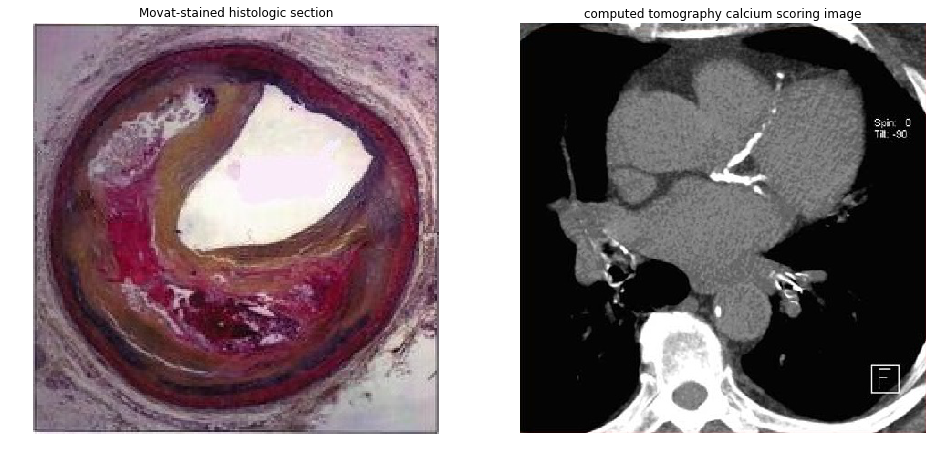

In [59]:
%matplotlib inline
from scipy import misc
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 16, 12
plt.subplot(121)
m = misc.imread('movat_staining.jpg', mode="RGB")
plt.imshow(m)
plt.axis('off')
plt.title('Movat-stained histologic section')
plt.subplot(122)
c = misc.imread('coronaryCT.jpg')
plt.imshow(c)
plt.axis('off')
plt.title('computed tomography calcium scoring image')


### 1) Gray scale image :

This specific type of image enhancement technique is used to convert the original image (figure 1) which not a gray scale image. As our figure 2 is already a gray scale image we don't apply this method to figure 2. The next cell implements the code to convert our figure 1 to a gray scale image.


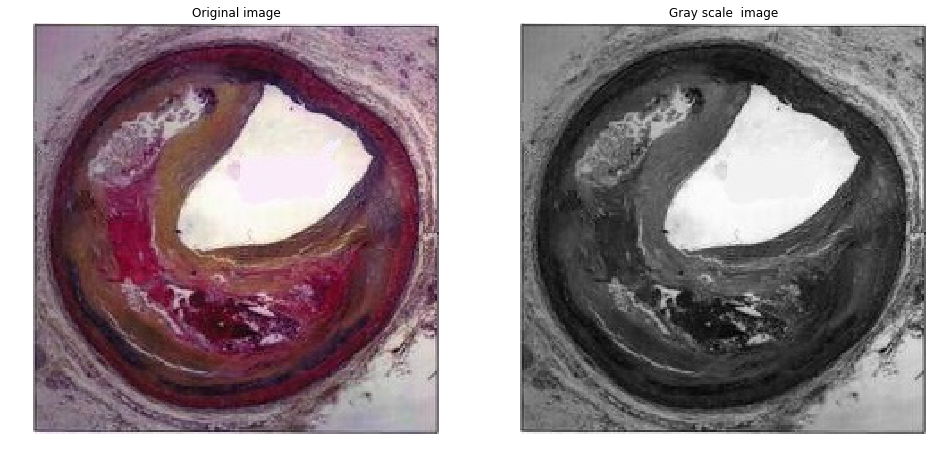

In [60]:
%matplotlib inline
from scipy import misc
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 16, 12 # Modifies the output figure size

plt.subplot(121)
movat1 = misc.imread('movat_staining.jpg', mode="RGB") # reads image

plt.imshow(movat1)
plt.axis('off')
plt.title('Original image')

plt.subplot(122)
movat2 = misc.imread('movat_staining.jpg', mode="L") # reads image in grayscale
plt.imshow(movat2, cmap="gray") # Displays image in grayscale
plt.title('Gray scale  image')
plt.axis('off')
plt.show()

First we need to read the image, the following function is used to read the image
<br>

**Syntax**     : *scipy.misc.imread(img, mode)* <br>

**Parameters** : <br>

1. *img*   - name of the image. <br>
2. *mode* -  Mode to convert image (in this case mode= "L" (8-bit pixels, black and white)).

*(Gujar et al. Python Based Image Processing.)*

**  possible effects of enhancement on interpretation of the image ** : <br>

Processing colour is complex, and Grayscale provides an easy way out. Intensity plays a major role, Grayscale  is usually sufficient to distinguish such edges.



### 2) Image Denoising :

Image Denoising is a Image Enhancement Technique which reconstructs an image from a noisy one. Its goal is to remove noise and preserve useful information. We use functions from openCV module to implement this technique. <br>

One of the fundamental challenges in image processing and computer vision is image denoising. What denoising does is to estimate the original image by suppressing noise from the image. Image noise may be caused by different sources ( from sensor or from environment) which are often not possible to avoid in practical situations. Therefore, image denoising plays an important role in a wide range of applications.

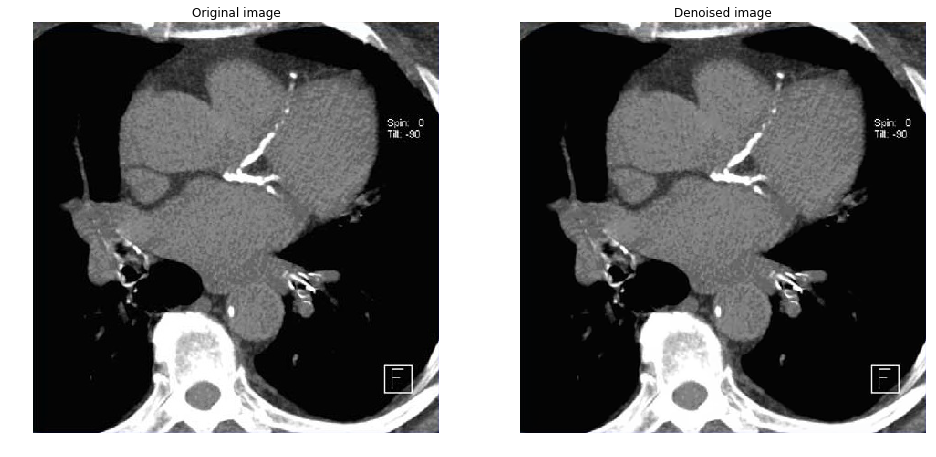

In [61]:
import numpy as np
import cv2        # this technique requires openCV module

img = cv2.imread('coronaryCT.jpg')  #read the image

dst = cv2.fastNlMeansDenoising(img, None, 3, 7, 21)  # function for denoising a grayscale image

plt.subplot(121),plt.imshow(img)
plt.axis('off')
plt.title('Original image')
plt.subplot(122),plt.imshow(dst)
plt.axis('off')
plt.title('Denoised image')
plt.show()

** syntax ** : *cv2.fastNlMeansDenoising(src, dst,  h=3,  templateWindowSize=7, searchWindowSize=21 )*

The method is based on a simple principle: replacing the color of a pixel with an average of the colors of similar pixels. But the most similar pixels to a given pixel have no reason to be close at all. It is therefore licit to scan a vast portion of the image in search of all the pixels that really resemble the pixel one wants to denoise. 



** Parameters ** : <br>

1. *src* - Input 8-bit 1-channel, 2-channel or 3-channel image.<br>

2. *dst* -  Output image with the same size and type as input image.<br>

3. *h* - Parameter regulating filter strength. Big h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise. <br>

4. *templateWindowSize* – Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value     7 pixels<br>

5. *searchWindowSize* – Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels. <br>

   *(Gloria Bueno García et al.,Learning Image Processing with OpenCV, 94)*

**  possible effects of enhancement on interpretation of the image ** : <br>

We assign "h" to 3 so that it preserves details but it also preserves some noise, the effects of enhancement might not be clearly visible at h = 3, if we increase the value of h we can clearly see the difference in the output image.

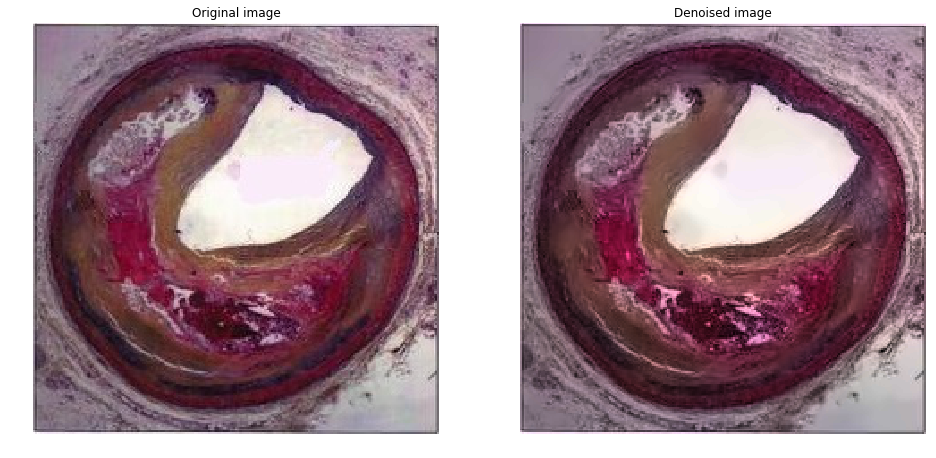

In [62]:
dst2 = cv2.fastNlMeansDenoisingColored(movat1,None,3,10,7,21) #function for denoising a colored image
plt.subplot(121)
plt.imshow(movat1)
plt.axis('off')
plt.title('Original image')
plt.subplot(122)
plt.imshow(dst2)
plt.axis('off')
plt.title('Denoised image')

** Syntax ** - *cv2.fastNlMeansDenoisingColored(src, dst, h, hColor, templateWindowSize, searchWindowSize)*

The function converts image to CIELAB colorspace and then separately denoise L and AB components with given h parameters using fastNlMeansDenoising function.<br>

** Parameters ** - 
1. *src* - Input 8-bit 1-channel, 2-channel or 3-channel image.<br>

2. *dst* -  Output image with the same size and type as input image.<br>

3. *h* - Parameter regulating filter strength. Big h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise. <br>

4. *hColor* – The same as h but for color components. For most images value equals 10 will be enought to remove colored noise and do not distort colors. <br>

5. *templateWindowSize* – Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value     7 pixels<br>

6. *searchWindowSize* – Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels. <br>

*(Gloria Bueno García et al.,Learning Image Processing with OpenCV, 94)*

**  possible effects of enhancement on interpretation of the image ** : <br>

We assign "h" to 3 so that it preserves details but it also preserves some noise, the effects of enhancement might not be clearly visible at h = 3, if we increase the value of h we can clearly see the difference in the output image.


### Histograms : 

It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about pixel value vs number of pixles of that image. Almost all image processing tools today, provides features on histogram.

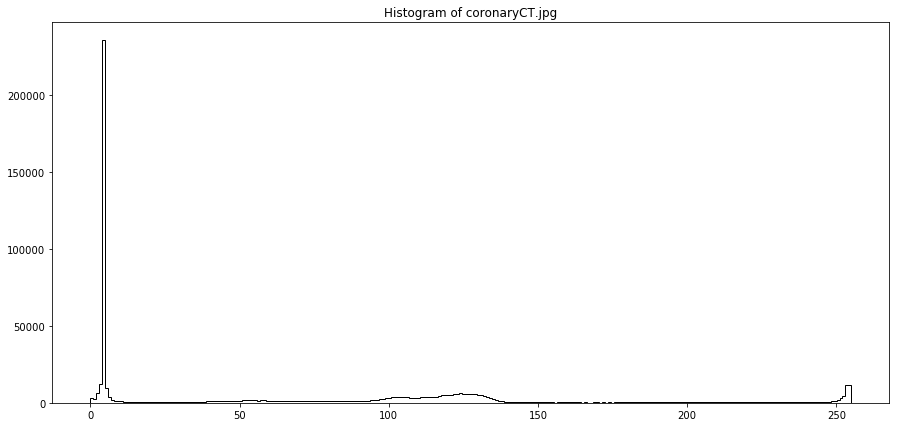

In [63]:
plt.rcParams["figure.figsize"] = 15, 7
plt.figure()
ht=plt.hist(dst.ravel(), bins=256, histtype='step', color='black')#function for plotting histogram
plt.title('Histogram of coronaryCT.jpg')

** Syntax ** - *hist(img.ravel(), bins, histtype, color)*

hist() provides a comparision between pixel value vs no of pixels.

** Parameters ** -

1. *img.ravel()* - A 1-D array, containing the elements of the input, is returned. A copy is made only if needed.
2. *bins* - the number of bins that your data will be divided into. You can specify it as an integer or as a list of bin edges.
3. *histype* - Type of histogram to be plotted ex- step.
4. *color* - color of the histogram.

*(Wood, M. A.,2015)*

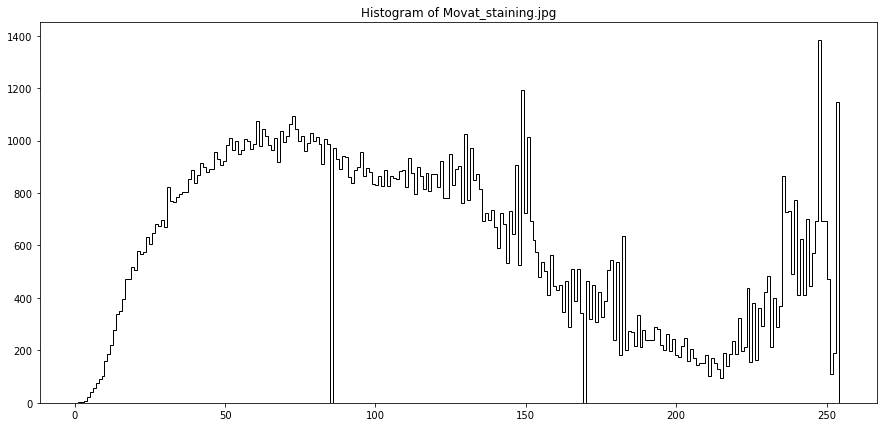

In [64]:
plt.figure()
ht=plt.hist(dst2.ravel(), bins=256, histtype='step', color='black')
plt.title('Histogram of Movat_staining.jpg')

### Image Sharpening : 

Image sharpening refers to any enhancement technique that highlights edges and fine details in an image.

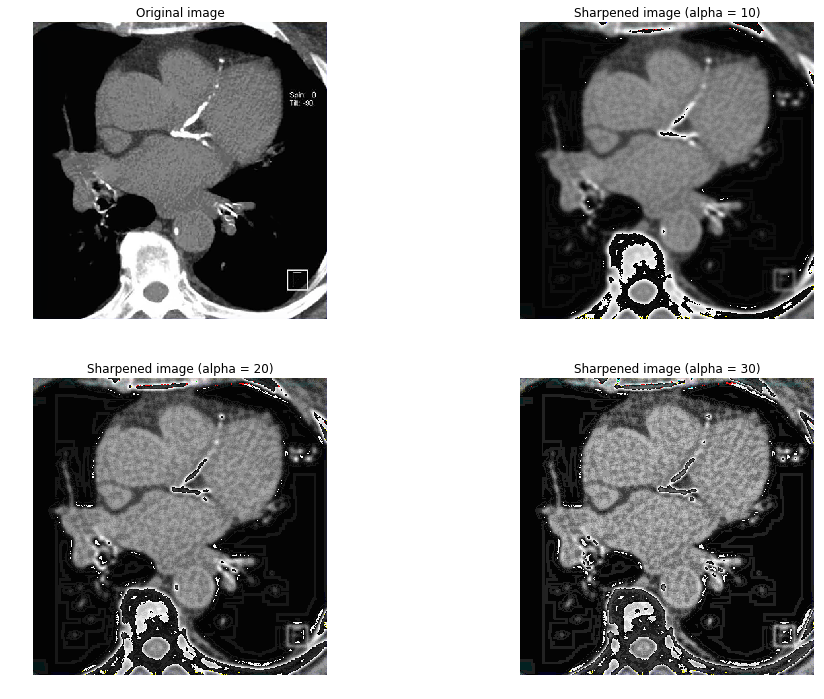

In [65]:
plt.rcParams["figure.figsize"] = 16, 12
from scipy import ndimage
blurred_f = ndimage.gaussian_filter(dst, 3)  #blurring of the image using gaussian filter
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1) #filter the blurred image using gaussian filter
alpha = 10
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f) #formula used for sharpening of the original image
plt.subplot(221)
plt.imshow(dst)
plt.axis('off')
plt.title('Original image')
plt.subplot(222)
plt.imshow(sharpened)
plt.axis('off')
plt.title('Sharpened image (alpha = 10)')
alpha = 20
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
plt.subplot(223)
plt.imshow(sharpened)
plt.axis('off')
plt.title('Sharpened image (alpha = 20)')
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
plt.subplot(224)
plt.imshow(sharpened)
plt.axis('off')
plt.title('Sharpened image (alpha = 30)')


Step 1 : Blur the original image using gaussian filter.<br>
step 2 : Filter the blurred image using gaussian filter.<br>
step 3 : Assign alpha.<br>
step 4 : sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f).<br>
step 5 : Plot.<br>

** Syntax ** - *gaussian_filter(img,sigma)*
Gaussian filter is mainly used for blurring or smoothing of the original image, It has two parameters.

** Parameters ** - 

1. *img* - original image
2. *sigma* - Standard deviation for Gaussian kernel. The standard deviations of the Gaussian filter are given for each axis as a sequence, or as a single number, in which case it is equal for all axes.

*(Van der Walt ,2014, scikit-image: image processing in Python)*

**  possible effects of enhancement on interpretation of the image ** : <br>

sharpening of the original image (i.e coronoryCT.jpg) results in the highlighting of the edeges and fine details in the image, from the sharpened output image we can clearly observe the calcium score in the coronory artery.

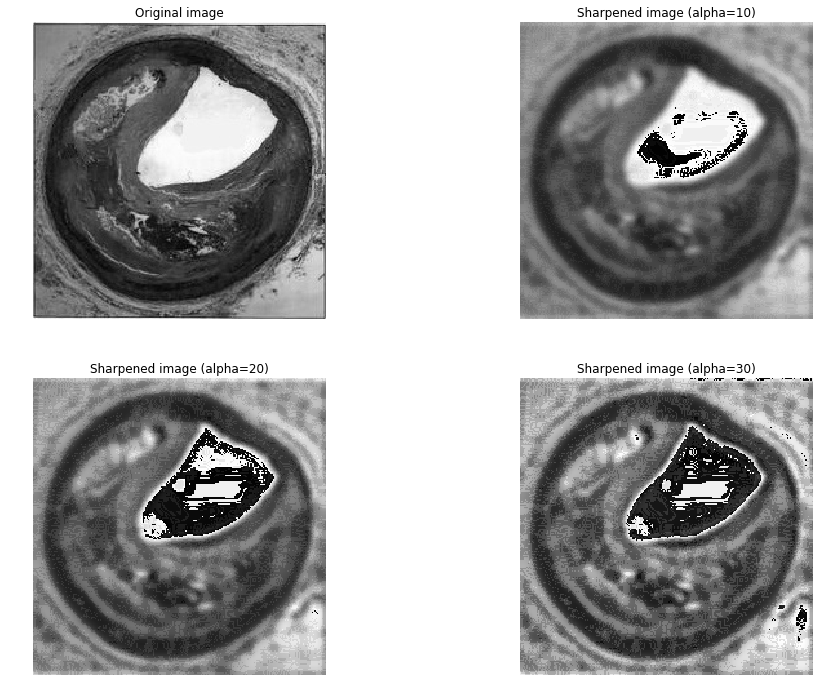

In [66]:
from scipy import ndimage
blurred_f2 = ndimage.gaussian_filter(movat2, 3)  #blurring of the image using gaussian filter
filter_blurred_f2 = ndimage.gaussian_filter(blurred_f2, 1) #filter the blurred image using gaussian filter
alpha2 = 10
sharpened2 = blurred_f2 + alpha2 * (blurred_f2 - filter_blurred_f2) #formula used for sharpening of the original image
plt.subplot(221)
plt.imshow(movat2, cmap= "gray")
plt.axis('off')
plt.title('Original image')

plt.subplot(222)
plt.imshow(sharpened2, cmap= "gray")
plt.axis('off')
plt.title('Sharpened image (alpha=10)')
alpha2 = 20
sharpened2 = blurred_f2 + alpha2 * (blurred_f2 - filter_blurred_f2)
plt.subplot(223)
plt.imshow(sharpened2, cmap= "gray")
plt.axis('off')
plt.title('Sharpened image (alpha=20)')
alpha2 = 30
sharpened2 = blurred_f2 + alpha2 * (blurred_f2 - filter_blurred_f2)
plt.subplot(224)
plt.imshow(sharpened2, cmap= "gray")
plt.axis('off')
plt.title('Sharpened image (alpha=30)')

### Edge Detection : 

Edge detection is an image processing technique for finding the boundaries of objects within images. It works by detecting discontinuities in brightness. Edge detection is used for image segmentation and data extraction in areas such as image processing, computer vision, and machine vision.

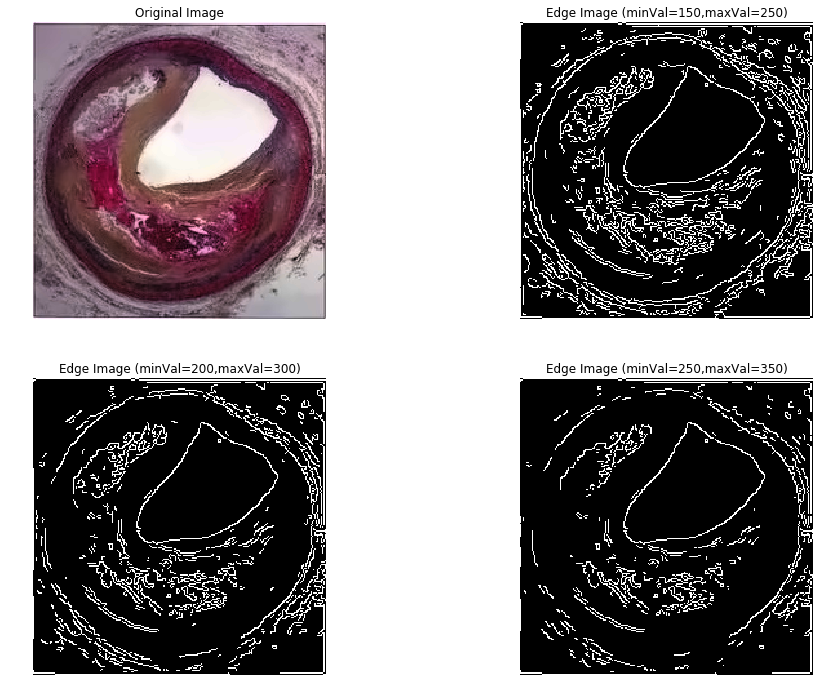

In [67]:

edges = cv2.Canny(dst2,150,250) #canny edge detector function

plt.subplot(221),plt.imshow(dst2)
plt.title('Original Image')
plt.axis('off')
plt.subplot(222),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image (minVal=150,maxVal=250)')
plt.axis('off')
edges = cv2.Canny(dst2,200,300)                     #Recommended values
plt.subplot(223),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image (minVal=200,maxVal=300)')
plt.axis('off')
edges = cv2.Canny(dst2,250,350)
plt.subplot(224),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image (minVal=250,maxVal=350)')
plt.axis('off')

plt.show()

The algorithm runs in 5 separate steps:
1. ** *Smoothing* **: Blurring of the image to remove noise.
2. ** *Finding gradients * **: The edges should be marked where the gradients of the image has
   large magnitudes.
3. ** *Non-maximum suppression * **: Only local maxima should be marked as edges.
4. ** *Double thresholding * **: Potential edges are determined by thresholding.
5. ** *Edge tracking by hysteresis * **: Final edges are determined by suppressing all edges that
   are not connected to a very certain (strong) edge.

** Syntax ** : *Canny(img,minVal,maxVal)*

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986.

** Parameters ** :

1. ** *img* ** : input image
2. ** *minVal* ** : Minimum threshold value
3. ** *minVal* ** : Maximum threshold value

*(Van der Walt ,2014, scikit-image: image processing in Python)*

**  possible effects of enhancement on interpretation of the image ** : <br>

From the Edge image we can clearly see the edges of Lipid pool(left- top corner) and the Fibrous Cap(white color part in color image).

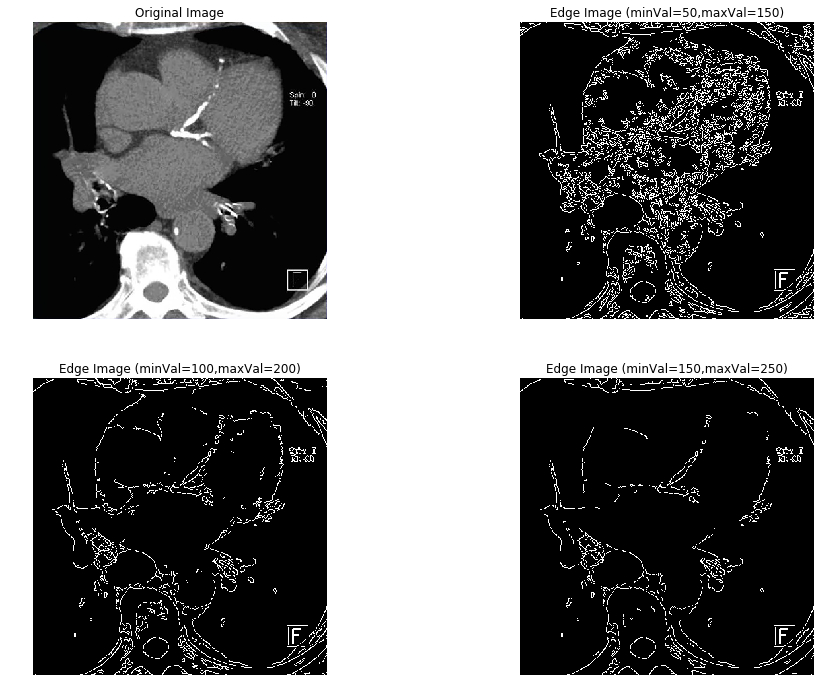

In [68]:
from ipywidgets import interact

edges = cv2.Canny(dst,50,150) #canny edge detector function

     
plt.subplot(221),plt.imshow(dst)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image (minVal=50,maxVal=150)')
plt.axis('off')
edges = cv2.Canny(dst,100,200)                            #Recommended values
plt.subplot(223),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image (minVal=100,maxVal=200)')
plt.axis('off')
edges = cv2.Canny(dst,150,250)
plt.subplot(224),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image (minVal=150,maxVal=250)')
plt.axis('off')
plt.show()


**  possible effects of enhancement on interpretation of the image ** : <br>

We can clearly see the edges of the calcium score in the coronary artery.

### References :

1. Pratik Vyas, Gunjan Patel. "Plaque Identification using Automated Image Enhancement"
 <br> <br>
2. Schoenhagen, P., Halliburton, S. S., White, R. D., Vince, D. G., Nissen, S. E., & Tuzcu, E. M. (2001). Characterization of  coronary atherosclerotic plaques and the significance of vessel calcification. Applied Radiology, 30(11), 46-53.
<br> <br>
3. Gujar, M. H., Mhatre, M. P., Ghanate, M. S., Kadam, M. S., Kurle, M. D., & Shitole, S. Python Based Image Processing.
<br> <br>
4. Learning Image Processing with OpenCV <br>
    By Gloria Bueno García, Oscar Deniz Suarez, José Luis Espinosa Aranda, Jesus Salido Tercero, Ismael Serrano Gracia, Noelia       Vállez Enano.
<br> <br>
5. Wood, M. A. (2015). Making plots with Matplotlib. In Python and Matplotlib Essentials for Scientists and Engineers. Morgan & Claypool Publishers.
<br> <br>
6. Van der Walt, S., Schönberger, J. L., Nunez-Iglesias, J., Boulogne, F., Warner, J. D., Yager, N., ... & Yu, T. (2014). scikit-image: image processing in Python. PeerJ, 2, e453.
<br> <br>

### Webliography :

1. Image credits - http://www.radiologyclearwater.com/CoronaryCalciumCT.aspx
2. RGB to Grayscale - https://dsp.stackexchange.com/questions/43701/convert-rgb-image-to-grayscale
3. Denoising  with oprnCV - https://docs.opencv.org/3.0-beta/modules/photo/doc/denoising.html
4. Histograms - https://matplotlib.org/users/image_tutorial.html
5. Sharpening - http://www.scipy-lectures.org/advanced/image_processing/auto_examples/plot_sharpen.html
6. scipy.ndimage.gaussian_filter - https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.ndimage.gaussian_filter.html
7. Canny edge detector - http://aishack.in/tutorials/canny-edge-detector/
8. Canny edge detector - http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html